# Storytelling Data Visualization Lab

In this lab you'll use a dataset called `housing_prices.csv` which contains the sales data of houses. The dataset and descriptions of the columns are available from [Kaggle](https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data). For your convenience, you can review the descriptions of the data columns from [here](data-description.txt).

Pretend you are a data analyst at an investment company where the board decided to make investments in real estates. Your boss asked you to analyze this housing sales dataset and present to the investment managers on **what features of houses are strong indicators of the final sale price**. You need to present your findings in intuitive ways so that the investment managers understand where your conclusions come from.

#### You will use the appropriate data visualization graphs to tell your stories.

## Challenge 1 - Understanding the Dataset

After receiving the data and clarifying your objectives with your boss, you will first try to understand the dataset. This allows you to decide how you will start your research in the next step.

#### First, import the basic libraries and the dataset.

In [2]:
# Import libraries
import pandas as pd
import scipy
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from scipy import stats
from scipy import interpolate
from scipy.interpolate import interp1d

# Librarie for hypothesis testing:
from scipy.stats import ttest_1samp, ttest_rel, ttest_ind
from scipy.stats import f_oneway

from scipy.stats import uniform
from scipy.stats import expon
from scipy.stats import norm
from scipy.stats import poisson
from scipy.stats import binom
from scipy.stats import ttest_ind

df = pd.read_csv('housing_prices.csv')

#### As a routine before analyzing a dataset, print the first few rows of the dataset

In [3]:
df.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


You find the dataset has 81 columns which are a lot. 

#### Since the column `Id` is meaningless in our data visualization work, let's drop it

In [79]:
# your code here

df= df.drop(["Id"], axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,MnPrv,NaN,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,GdPrv,Shed,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,Inside,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,142125


You care about missing values. If a column has too many missing values, it is not reliable to use it to predict sales price.

#### In the cell below, calculate the percentage of missing values for each column. 

Make a table containing the column name and the percentage of missing values. Print the columns where more than 20% of values are missing. An example of your output looks like:

![Missing Values](missing-values.png)

[This reference](https://stackoverflow.com/questions/51070985/find-out-the-percentage-of-missing-values-in-each-column-in-the-given-dataset) can help you make the missing values table.

In [80]:
pd.set_option("display.max_rows", 200)

percent_missing = (df.isna().sum() * 100) / len(df.index)
percent_missing.rename(columns = {'index': 'column_name', '0': 'percentage'})

MSSubClass        0.000000
MSZoning          0.000000
LotFrontage      17.739726
LotArea           0.000000
Street            0.000000
Alley            93.767123
LotShape          0.000000
LandContour       0.000000
Utilities         0.000000
LotConfig         0.000000
LandSlope         0.000000
Neighborhood      0.000000
Condition1        0.000000
Condition2        0.000000
BldgType          0.000000
HouseStyle        0.000000
OverallQual       0.000000
OverallCond       0.000000
YearBuilt         0.000000
YearRemodAdd      0.000000
RoofStyle         0.000000
RoofMatl          0.000000
Exterior1st       0.000000
Exterior2nd       0.000000
MasVnrType        0.547945
MasVnrArea        0.547945
ExterQual         0.000000
ExterCond         0.000000
Foundation        0.000000
BsmtQual          2.534247
BsmtCond          2.534247
BsmtExposure      2.602740
BsmtFinType1      2.534247
BsmtFinSF1        0.000000
BsmtFinType2      2.602740
BsmtFinSF2        0.000000
BsmtUnfSF         0.000000
T

In [81]:
# Not sure why this is giving an error:
filter = (percent_missing["percentage"] > 20.0)
percent_missing[filter].head()

KeyError: 'percentage'

#### Drop the columns you find that have more than 20% missing values.

After dropping, check the shape of your dataframes. You should have 75 columns now.

In [82]:
# your code here
df= df.drop(["Alley","PoolQC", "FireplaceQu","Fence", "MiscFeature"], axis=1)
df

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,LotShape,LandContour,Utilities,LotConfig,LandSlope,...,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,Reg,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,IR1,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,IR1,Lvl,AllPub,Corner,Gtl,...,272,0,0,0,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,IR1,Lvl,AllPub,FR2,Gtl,...,0,0,0,0,0,12,2008,WD,Normal,250000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,60,RL,62.0,7917,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,8,2007,WD,Normal,175000
1456,20,RL,85.0,13175,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,0,2,2010,WD,Normal,210000
1457,70,RL,66.0,9042,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,0,0,0,0,2500,5,2010,WD,Normal,266500
1458,20,RL,68.0,9717,Pave,Reg,Lvl,AllPub,Inside,Gtl,...,112,0,0,0,0,4,2010,WD,Normal,142125


In [83]:
df.columns

Index(['MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'LotShape', 'LandContour', 'Utilities', 'LotConfig', 'LandSlope',
       'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 'HouseStyle',
       'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 'RoofStyle',
       'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 'MasVnrArea',
       'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond',
       'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1', 'BsmtFinType2',
       'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating', 'HeatingQC',
       'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
       'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual', 'TotRmsAbvGrd',
       'Functional', 'Fireplaces', 'GarageType', 'GarageYrBlt', 'GarageFinish',
       'GarageCars', 'GarageArea', 'GarageQual', 'GarageCond', 'PavedDrive',
       'WoodDeckSF', 'OpenPorchSF'

Since you're asked to analyze sale prices, first let's see if the sale prices (column `SalePrice`) has a normal distribution. This is important because normally distributed data can be better represented with mathematical models.

#### In the cell below, use the propriate graph to visualize the shape of distribution of the sale prices. Then explain what you find from the graph about data distribution.

[Text(0, 0, '0')]

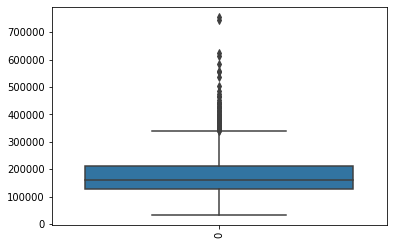

In [90]:
# your code here
ax = sns.boxplot(data=df["SalePrice"])
ax.set_xticklabels(ax.get_xticklabels(),rotation=90)

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x1a27d247d0>]],
      dtype=object)

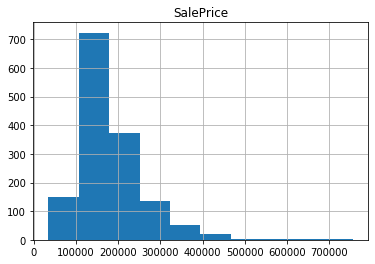

In [93]:
df.hist(column="SalePrice")

In [ ]:
# your comment here
# The distribution is a right skewed distribution. This can also be seen in the boxplot.

## Bonus Challenge 1 - Adjust Data Distribution

If you used the correct method in the previous step, you should have found the data distribution is skewed to the left. In order to improve your data visualization in the next steps, you can opt to adjust the `SalePrice` column by applying a mathematical function to the values. The goal is to produce a bell-shape normal distribution after applying the mathematical function to the sale price.

*This technique is optional in data visualization but you'll find it useful in your future machine learning analysis.*

#### In the cell below, adjust the `SalePrice` column so that the data are normally distributed.

Try applying various mathematical functions such as square root, power, and log to the `SalePrice` column. Visualize the distribution of the adjusted data until you find a function that makes the data normally distributed. **Create a new column called `SalePriceAdjusted` to store the adjusted sale price.**

[This reference](https://trainingdatascience.com/workshops/histograms-and-skewed-data/) shows you examples on how to adjust skewed data.

In [ ]:
# your code here


## Challenge 2 - Exploring Data with Common Sense

Now that we have a general understanding of the dataset, we start exploring the data with common sense by means of data visualization. Yes, in data analysis and even machine learning you are often required to use common sense. You use your common sense to make a scientific guess (i.e. hypothesis) then use data analytics methods to test your hypothesis.

This dataset is about housing sales. According to common sense, housing prices depend on the following factors:

* **Size of the house** (`GrLivArea`, `LotArea`, and `GarageArea`).

* **Number of rooms** (`BedroomAbvGr`, `KitchenAbvGr`, `FullBath`, `HalfBath`, `BsmtFullBath`, `BsmtHalfBath`).

* **How long the house has been built or remodeled** (`YearBuilt` and `YearRemodAdd`).

* **Neighborhood of the house** (`Neighborhood`).

#### In this challenge, use the appropriate graph type to visualize the relationships between `SalePrice` (or `SalePriceAdjusted`) and the fields above. 

Note that:

* Transform certain columns in order to visualize the data properly based on common sense. For example:
    * Visualizing how the number of half bathrooms affected the sale price probably does not make sense. You can create a new column to calculate the total number of bathrooms/rooms then visualize with the calculated number.
    * `YearBuilt` and `YearRemodAdd` are year numbers not the age of the house. You can create two new columns for how long the house has been built or remodeled then visualize with the calculated columns.
* Make comments to explain your thinking process.

In [11]:
# your code here
# add cells as needed

df["total_bathrooms"] = ((df["HalfBath"]/2) + df["FullBath"])
df["total_bsmtbath"] = ((df["BsmtHalfBath"]/2) + df["BsmtFullBath"])
df

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice,halfbath_new,bsmthalfbath_new,total_bathrooms,total_bsmtbath
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2008,WD,Normal,208500,2,1.0,2.5,1.0
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,5,2007,WD,Normal,181500,0,0.5,2.0,0.5
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,9,2008,WD,Normal,223500,2,1.0,2.5,1.0
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,2,2006,WD,Abnorml,140000,0,1.0,1.0,1.0
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,12,2008,WD,Normal,250000,2,1.0,2.5,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1455,1456,60,RL,62.0,7917,Pave,NaN,Reg,Lvl,AllPub,...,0,8,2007,WD,Normal,175000,2,0.0,2.5,0.0
1456,1457,20,RL,85.0,13175,Pave,NaN,Reg,Lvl,AllPub,...,0,2,2010,WD,Normal,210000,0,1.0,2.0,1.0
1457,1458,70,RL,66.0,9042,Pave,NaN,Reg,Lvl,AllPub,...,2500,5,2010,WD,Normal,266500,0,0.0,2.0,0.0
1458,1459,20,RL,68.0,9717,Pave,NaN,Reg,Lvl,AllPub,...,0,4,2010,WD,Normal,142125,0,1.0,1.0,1.0


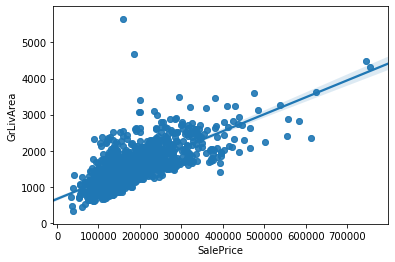

In [124]:
# SalePrice vs GrLivArea

plt.scatter(x = "SalePrice", y = "GrLivArea", data = df, alpha = 0.5)

sns.regplot(x="SalePrice", y="GrLivArea", data= df)

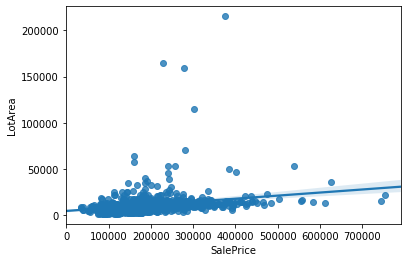

In [96]:
# SalePrice vs LotArea
sns.regplot(x="SalePrice", y="LotArea", data= df)

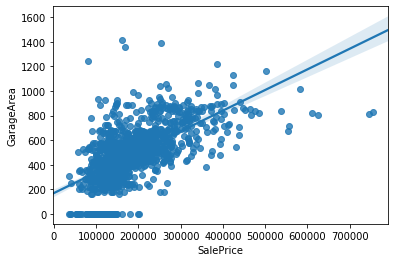

In [101]:
# SalePrice vs GarageArea
sns.regplot(x="SalePrice", y="GarageArea", data= df)

<BarContainer object of 1460 artists>

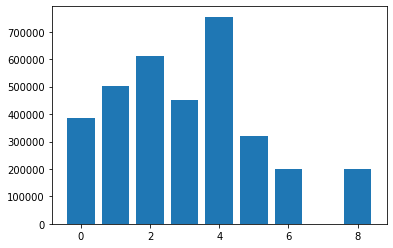

In [112]:
# SalePrice vs BedroomAbvGr
plt.bar(df["BedroomAbvGr"], df["SalePrice"])

<BarContainer object of 1460 artists>

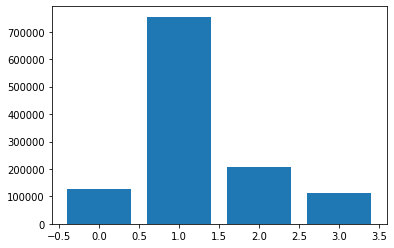

In [113]:
# SalePrice vs KitchenAbvGr
plt.bar(df["KitchenAbvGr"], df["SalePrice"])

<BarContainer object of 1460 artists>

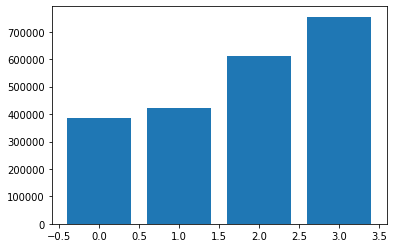

In [115]:
# SalePrice vs FullBathAbvGr
plt.bar(df["FullBath"], df["SalePrice"])

<BarContainer object of 1460 artists>

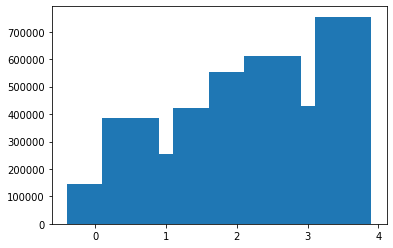

In [12]:
# SalePrice vs Total bathrooms
plt.bar(df["total_bathrooms"], df["SalePrice"])

<BarContainer object of 1460 artists>

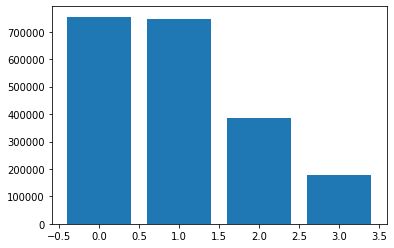

In [14]:
# SalePrice vs Basement FullBth
plt.bar(df["BsmtFullBath"], df["SalePrice"])

<BarContainer object of 1460 artists>

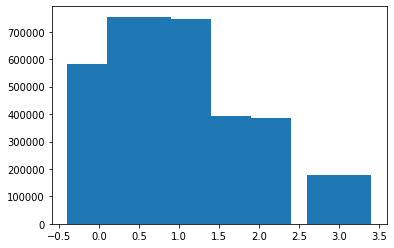

In [17]:
# SalePrice vs Total bathrooms
plt.bar(df["total_bsmtbath"], df["SalePrice"])

<BarContainer object of 1460 artists>

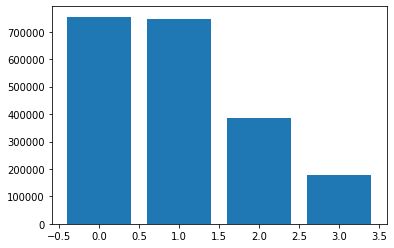

In [116]:
# SalePrice vs BedroomAbvGr
plt.bar(df["BsmtFullBath"], df["SalePrice"])

In [117]:
df["HalfBath"]b

0       1
1       0
2       1
3       0
4       1
       ..
1455    1
1456    0
1457    0
1458    0
1459    1
Name: HalfBath, Length: 1460, dtype: int64

<BarContainer object of 1460 artists>

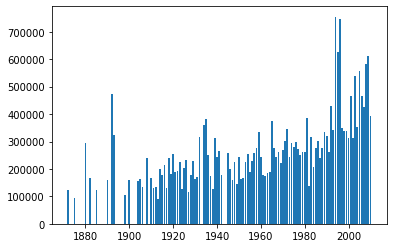

In [118]:
# SalePrice vs YearBuilt
plt.bar(df["YearBuilt"], df["SalePrice"])

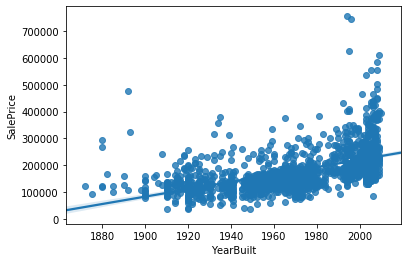

In [121]:
sns.regplot(x="YearBuilt", y="SalePrice", data= df)

<BarContainer object of 1460 artists>

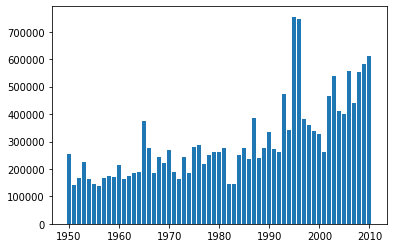

In [119]:
# SalePrice vs Year Remodeled
plt.bar(df["YearRemodAdd"], df["SalePrice"])

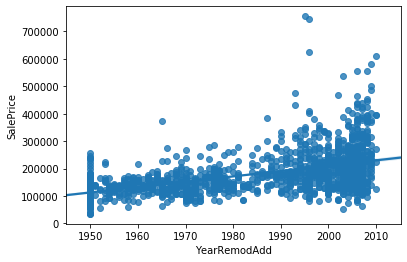

In [122]:
sns.regplot(x="YearRemodAdd", y="SalePrice", data= df)

## Bonus Challenge 2 - Exploring Data with Correlation Heatmap

Now you have explored data visualizations with certain fields based on common sense. In the dataset there are many other fields that you are not sure whether they are important factors for the sale price. What is the best way to explore those fields without investigating them individually?

Making scatter matrix is not an option here because there are too many fields which makes it extremely time consuming to create scatter matrix. One option you have is to create a heatmap. Heatmaps are much less expensive to create than scatter matrixes. You can use heatmaps to visualize the pairwise correlations between each two variables.

Here is a [reference](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) you can use to learn how to creat the pairwise correlation heatmap. Your heatmap should look like below:

![Corr Heatmap](heatmap.png)

In [ ]:
# your code here


In your heatmap, you can easily identify the highly correlated (either positively or negatively) variables by looking for the grids with darker colors. 

#### In the cell below, summarize what variables are highly correlated to the sale price?

In [ ]:
# your comment here


## Challenge 3 - Present Your Stories

Now based on your findings from the explorations, summarize and present your stories.

#### Present the top 5 factors that affect the sale price.

Use the following format to present each factor:

1. A title line about the factor.

1. No more than 3 sentences to describe the relationship between the factor and the sale price.

1. Support your point with the appropriate graph.

In [ ]:
# your responses here
# add cells as needed

### 1. Ground Living Area

This is one of the many area-related parameters available. This one specifically indicates the above ground (grade) living area (in square feet) available in the house. It can be seen that there is quite a strong relationship between the saleprice of a house and this living area. The higher the Ground Living Area, the higher the Sale Price.

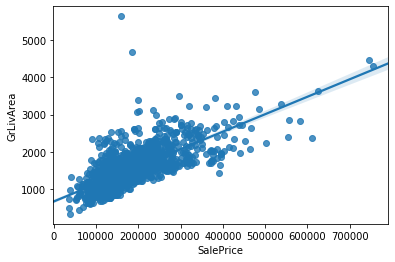

In [125]:
sns.regplot(x="SalePrice", y="GrLivArea", data= df)

### 2. Lot Area

Lot structures of a house can include private walkways, a detached garage with driveway access to the alley and a small area for garbage.
The Sale Price tends to be a bit higher, when the Lot Area is bigger.
Although there is no high increase in sale price when the lot area increases.

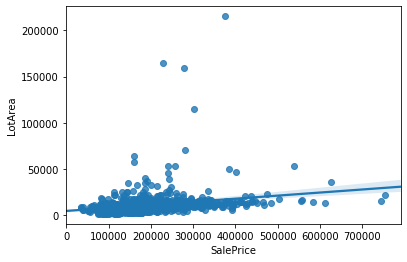

In [140]:
# SalePrice vs LotArea
sns.regplot(x="SalePrice", y="LotArea", data= df)

###  3. Number of Full Bathrooms

A full bathroom is made up of four parts: a sink, a shower, a bathtub, and a toilet.
It´s very clear that the sale price increases when the number of full Bathrooms increases.
The sale price almost doubles with an amount of three full bathrooms.
Also the high sale price in appartments with no full Bathroom is remarkable.

<BarContainer object of 1460 artists>

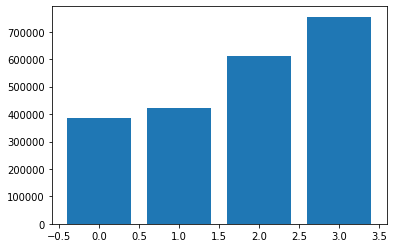

In [141]:
# SalePrice vs BedroomAbvGr
plt.bar(df["FullBath"], df["SalePrice"])

### 4. Year Built 

An increasing trend can be seen concerning the Year built of an appartment:
The more recent the appartment, the higher the Sale Price.
Two outliers can be seen for appartments that are build just before 1900 and just before 2000.

<BarContainer object of 1460 artists>

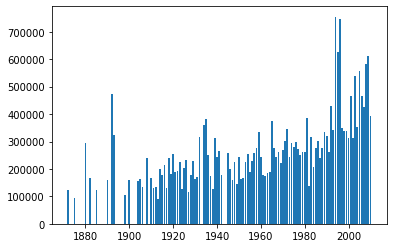

In [142]:
# SalePrice vs YearBuilt
plt.bar(df["YearBuilt"], df["SalePrice"])

### 5. Year Remodelled

Appartments that have been remodelled more recently, tend to have a higher Sale Price.
Just like for the Year Build, two outliers can be seen for appartments that have been remodelled in 1965 and around 1995.
It is a known factor that remodelling an appartment, making it more modern, will increase the Sale Price.

<BarContainer object of 1460 artists>

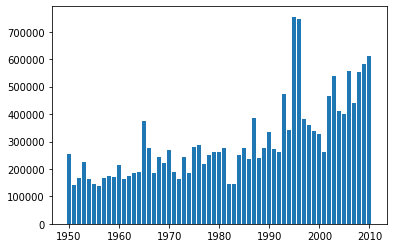

In [143]:
# SalePrice vs Year Remodeled
plt.bar(df["YearRemodAdd"], df["SalePrice"])